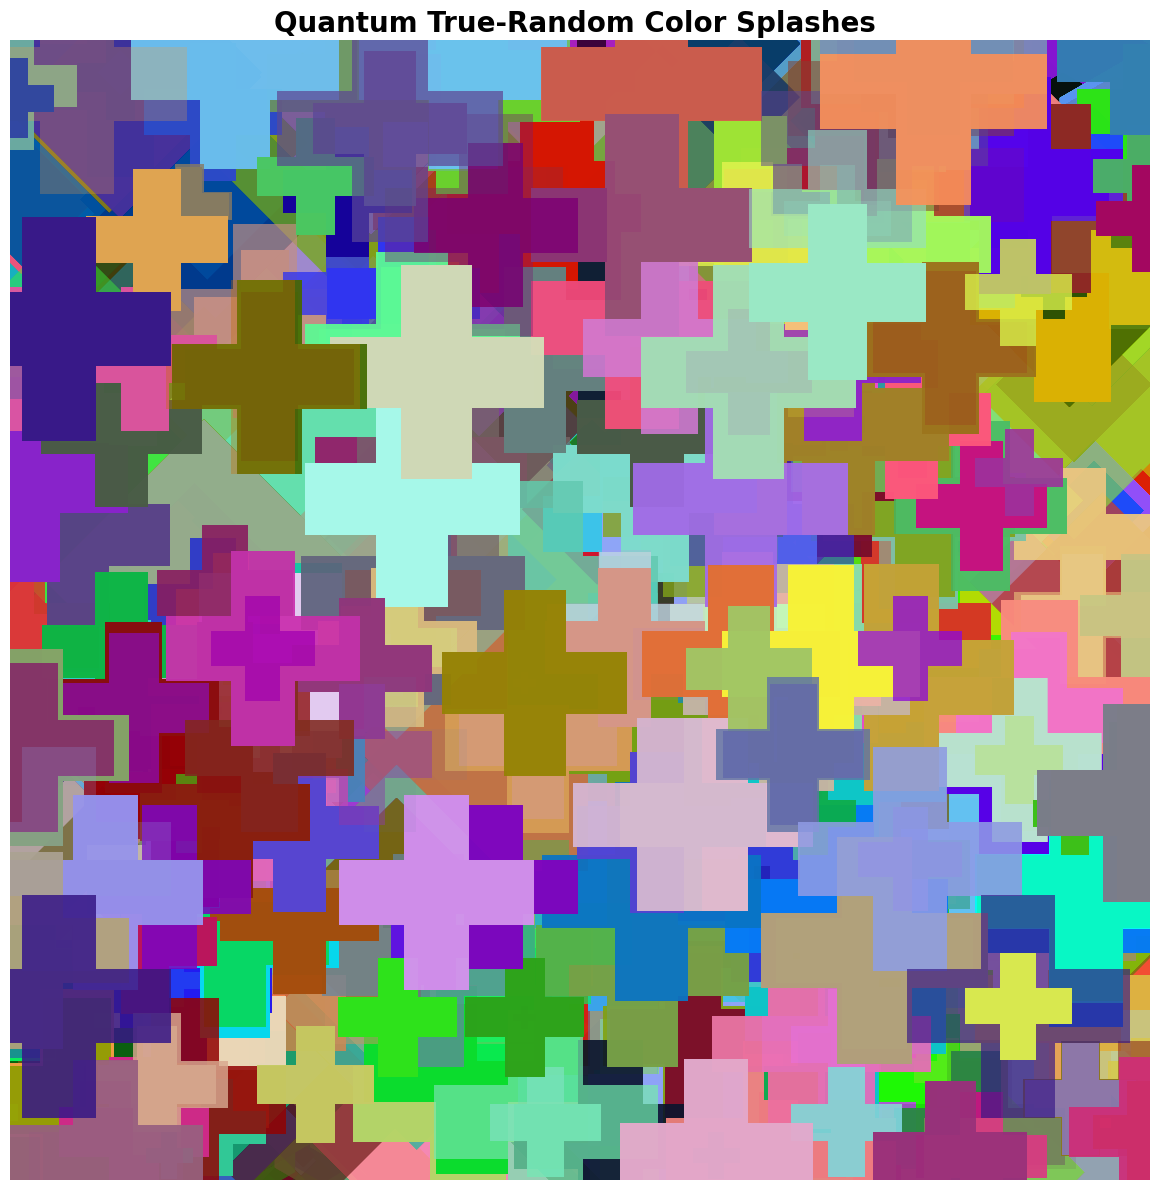

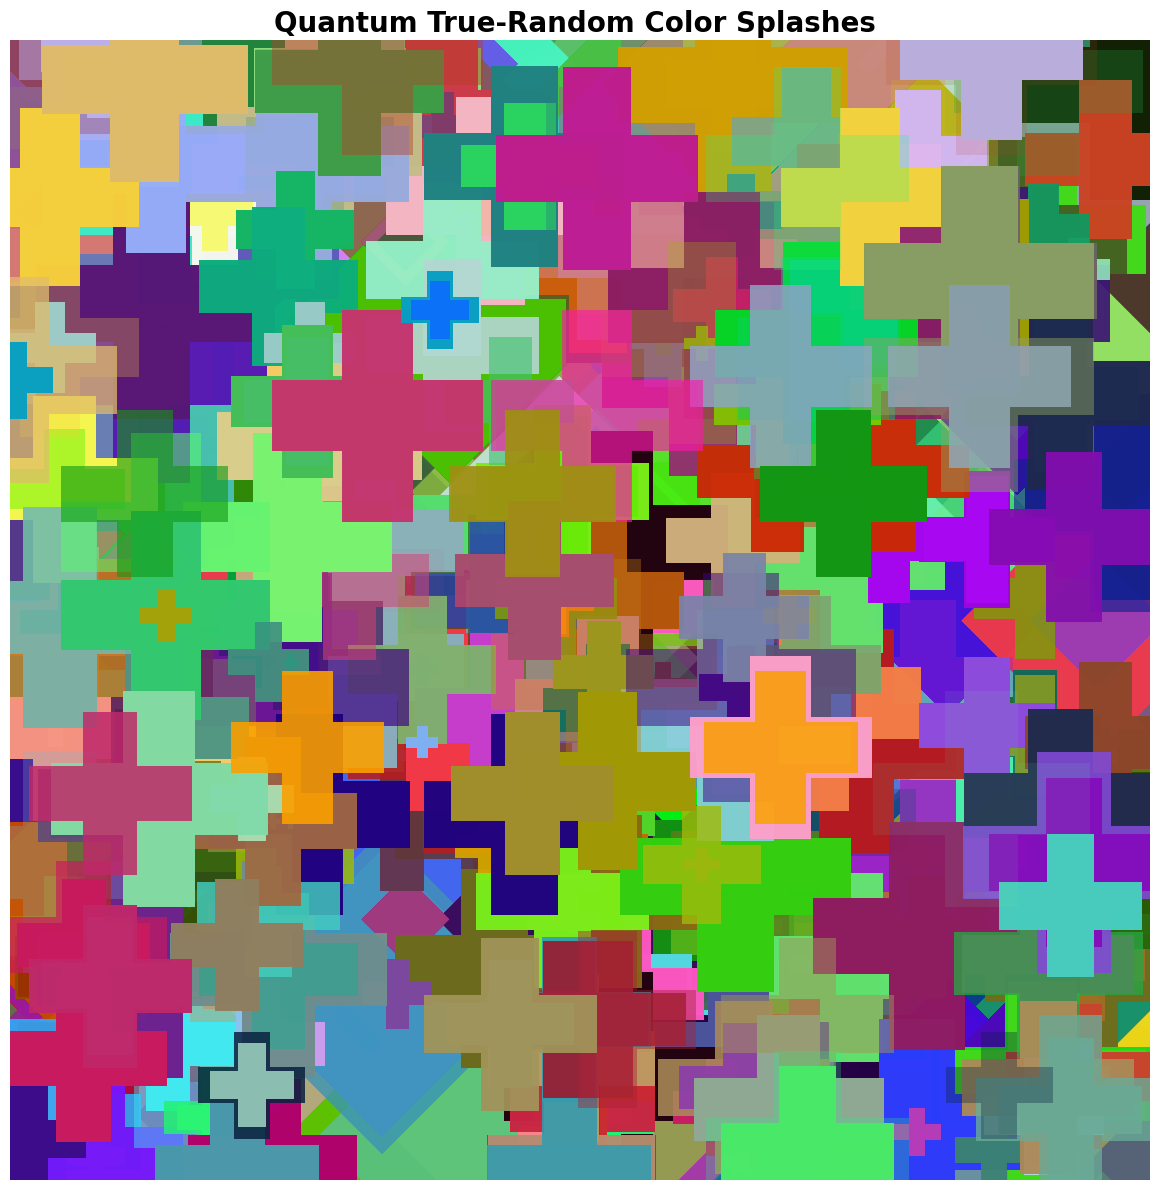

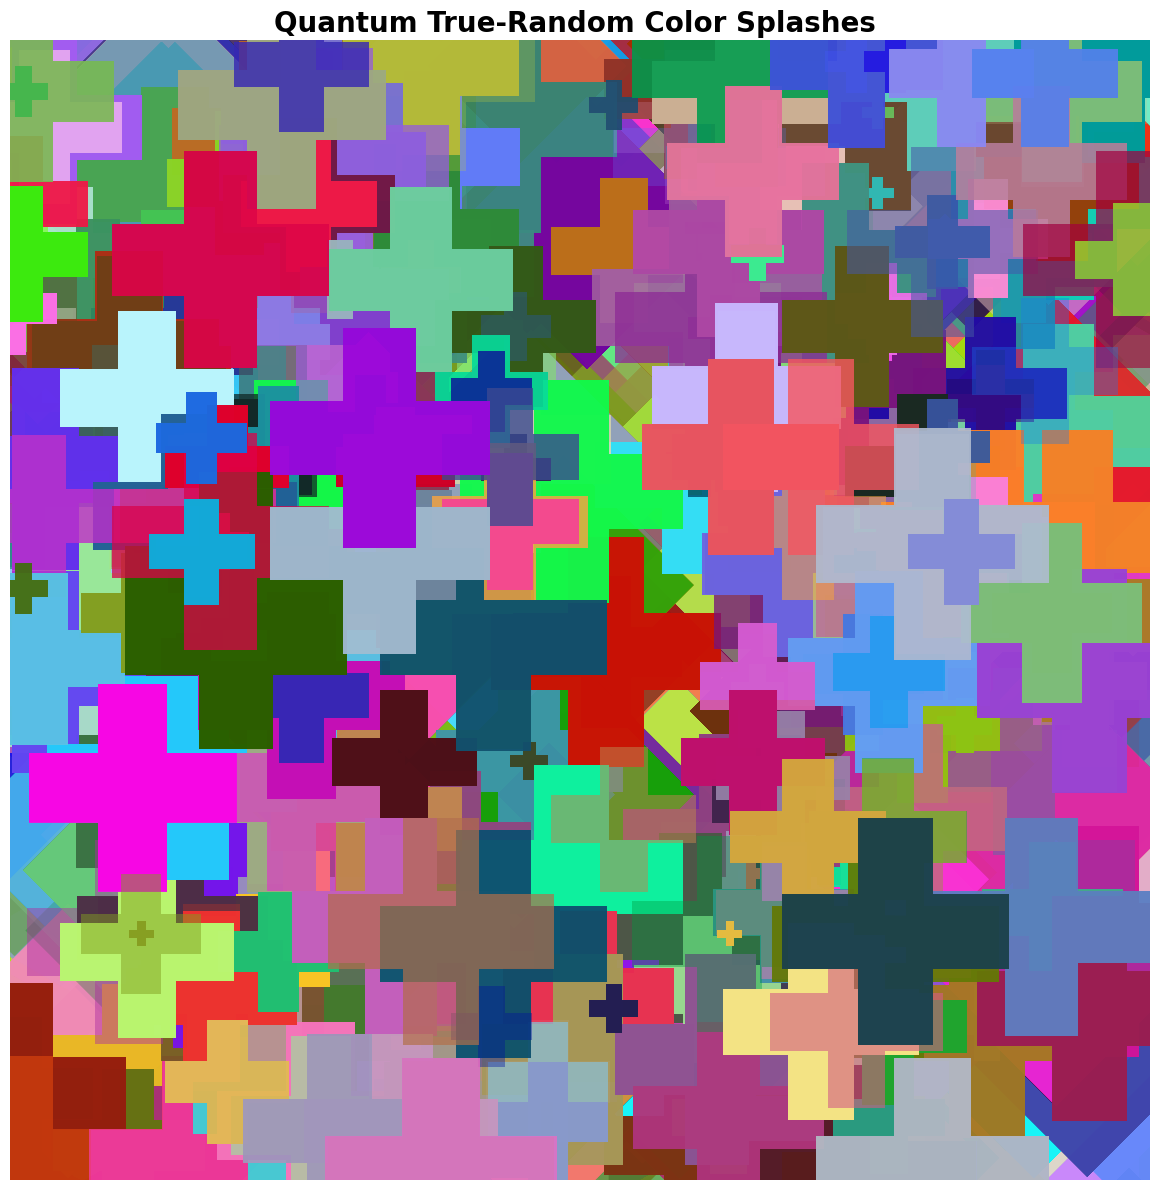

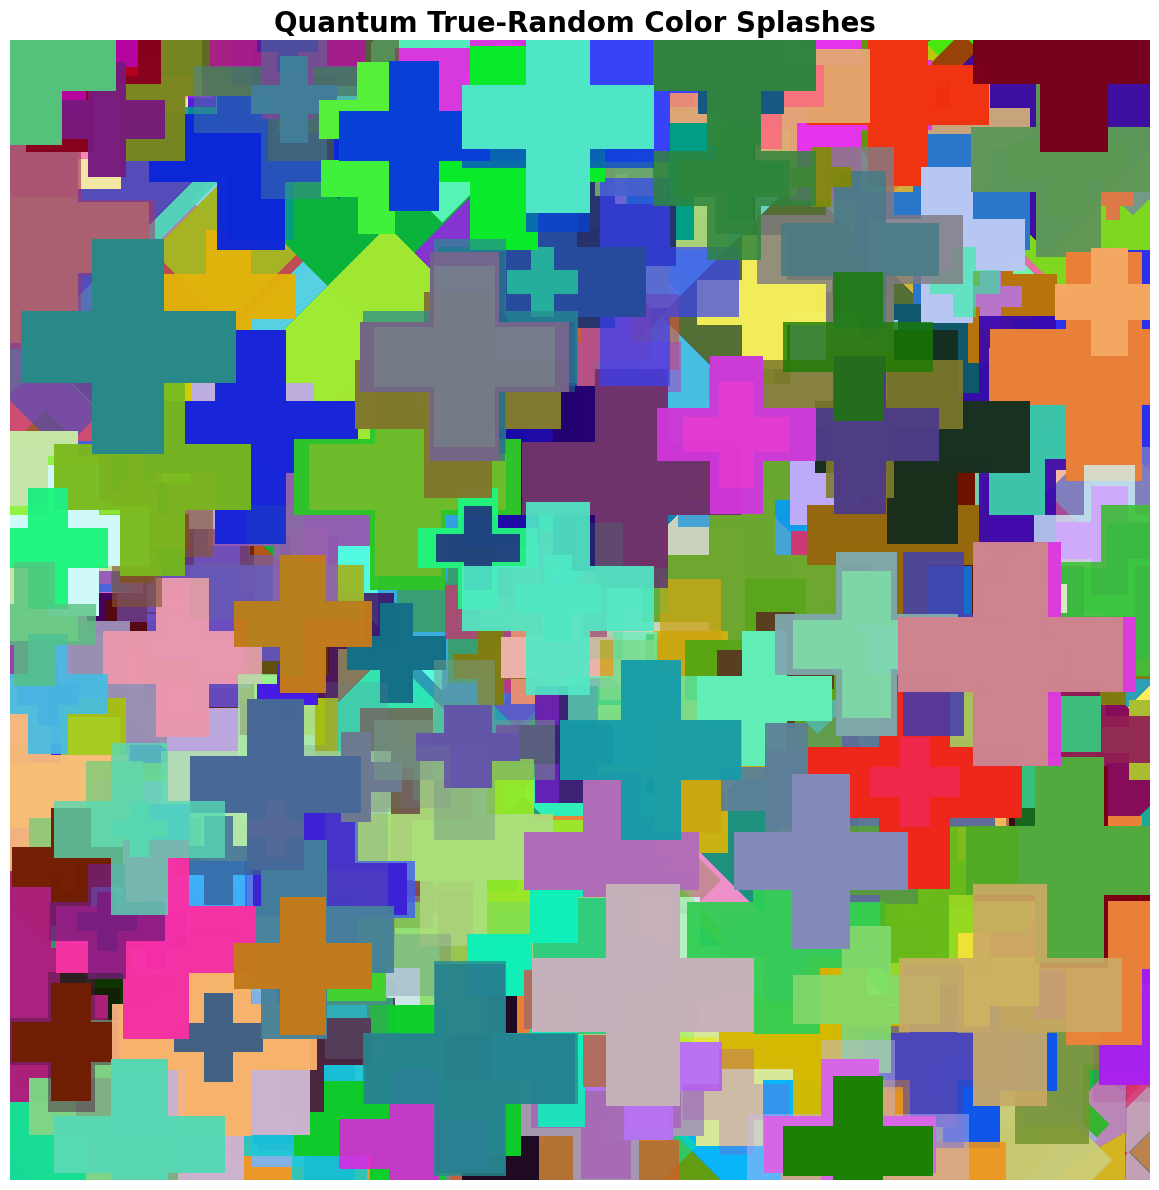

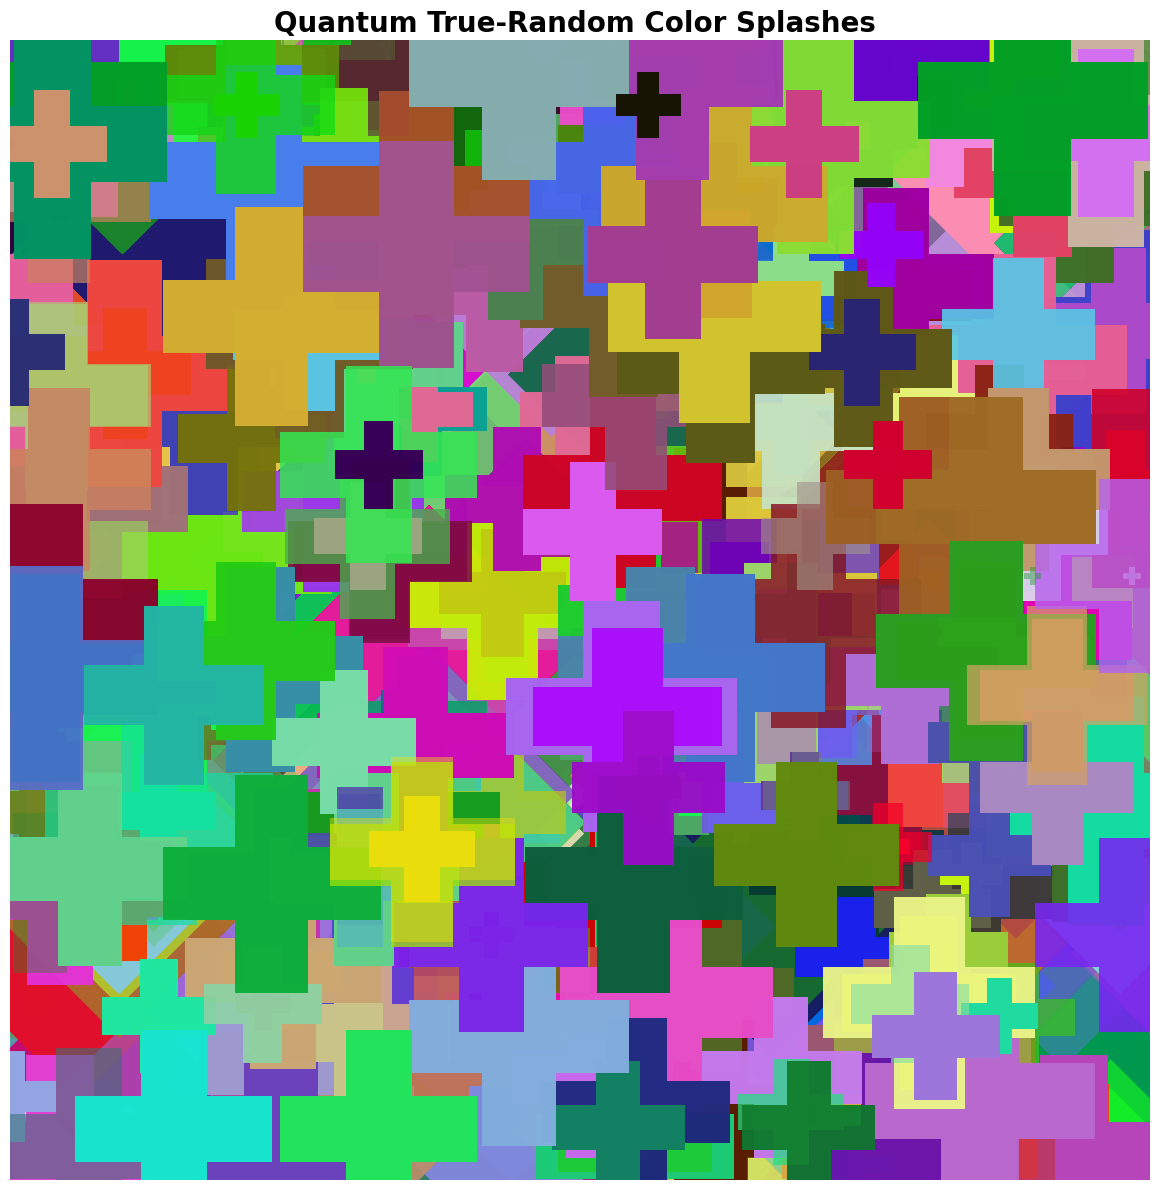

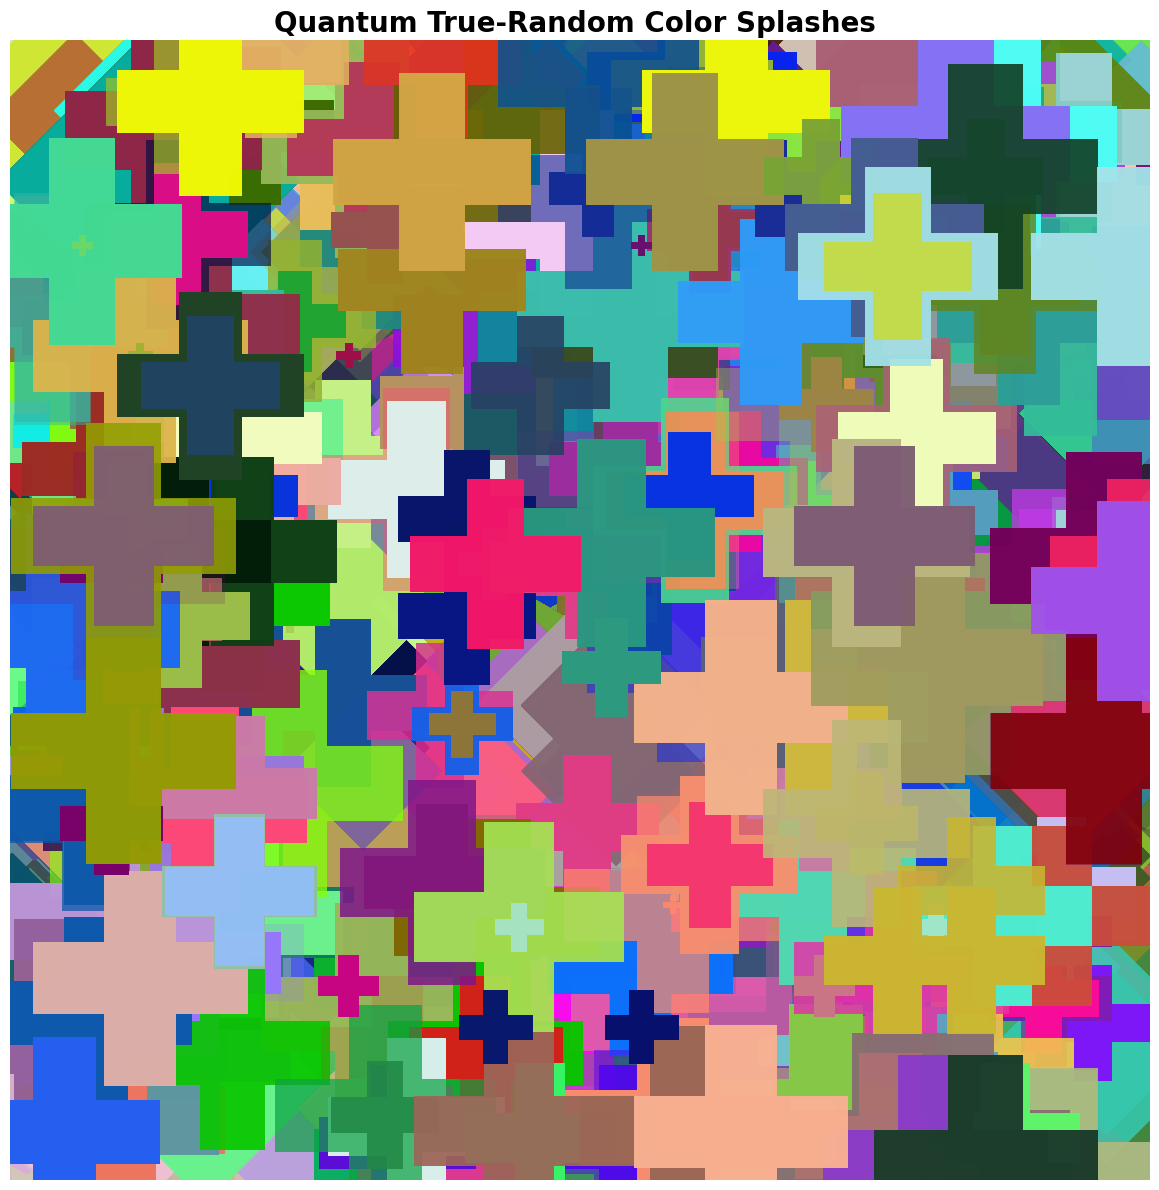

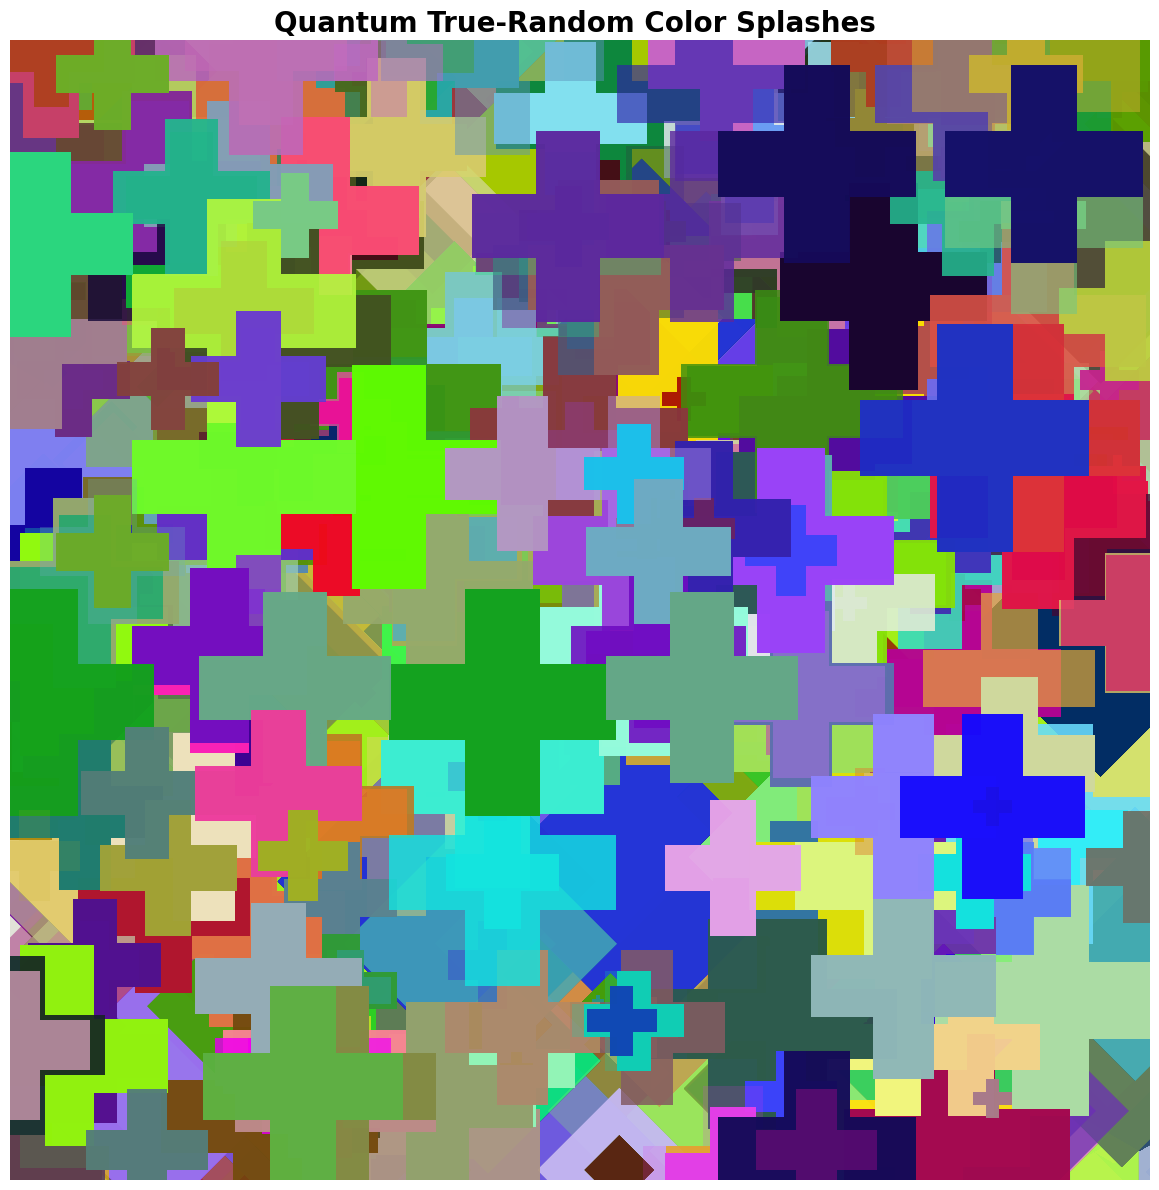

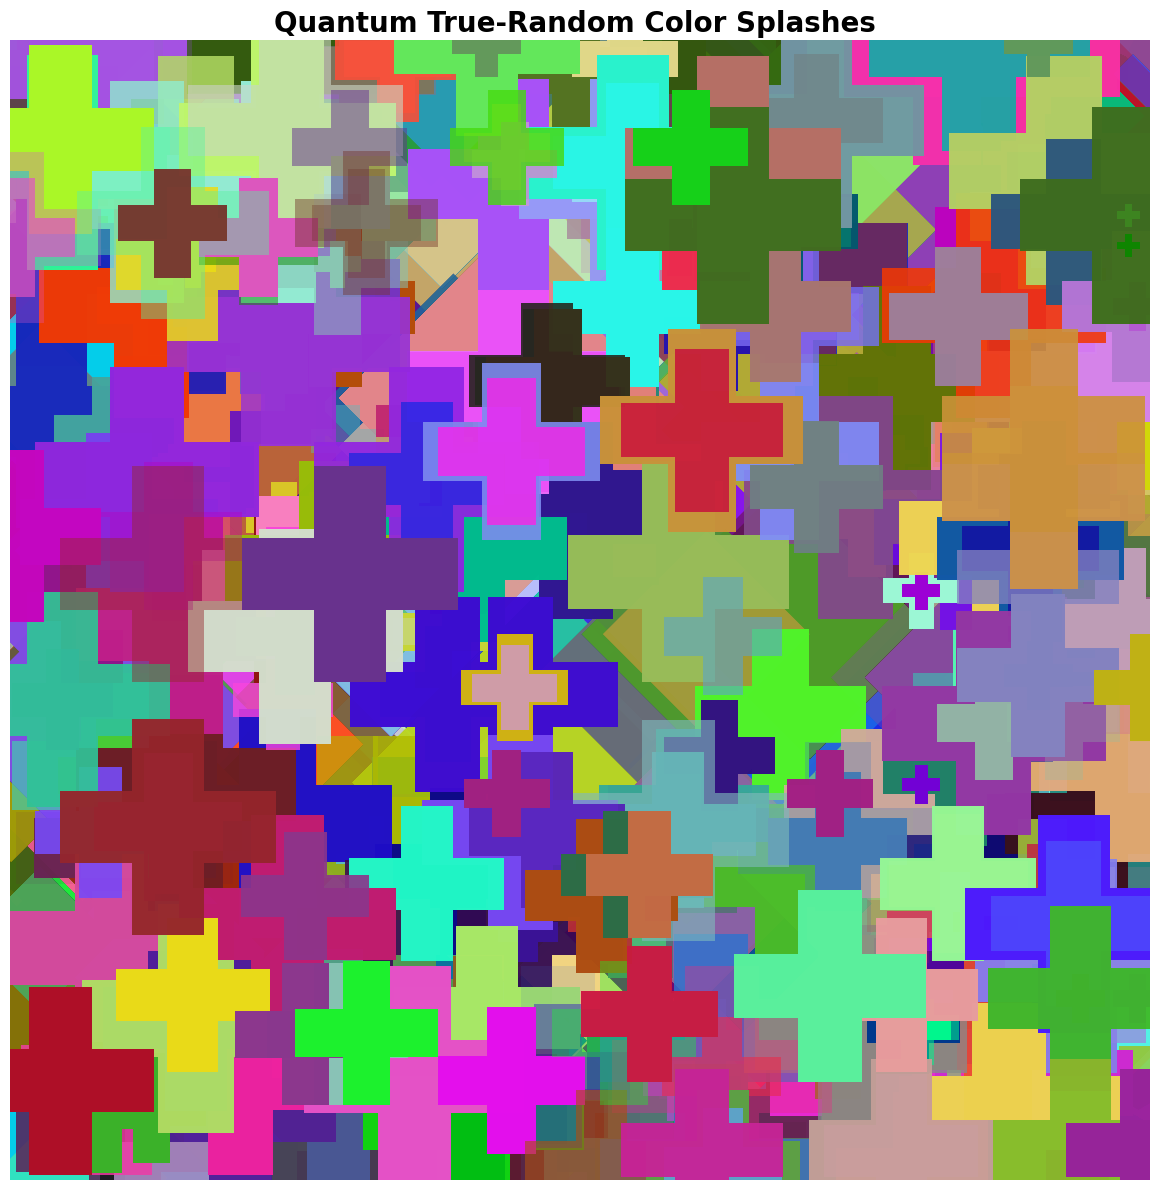

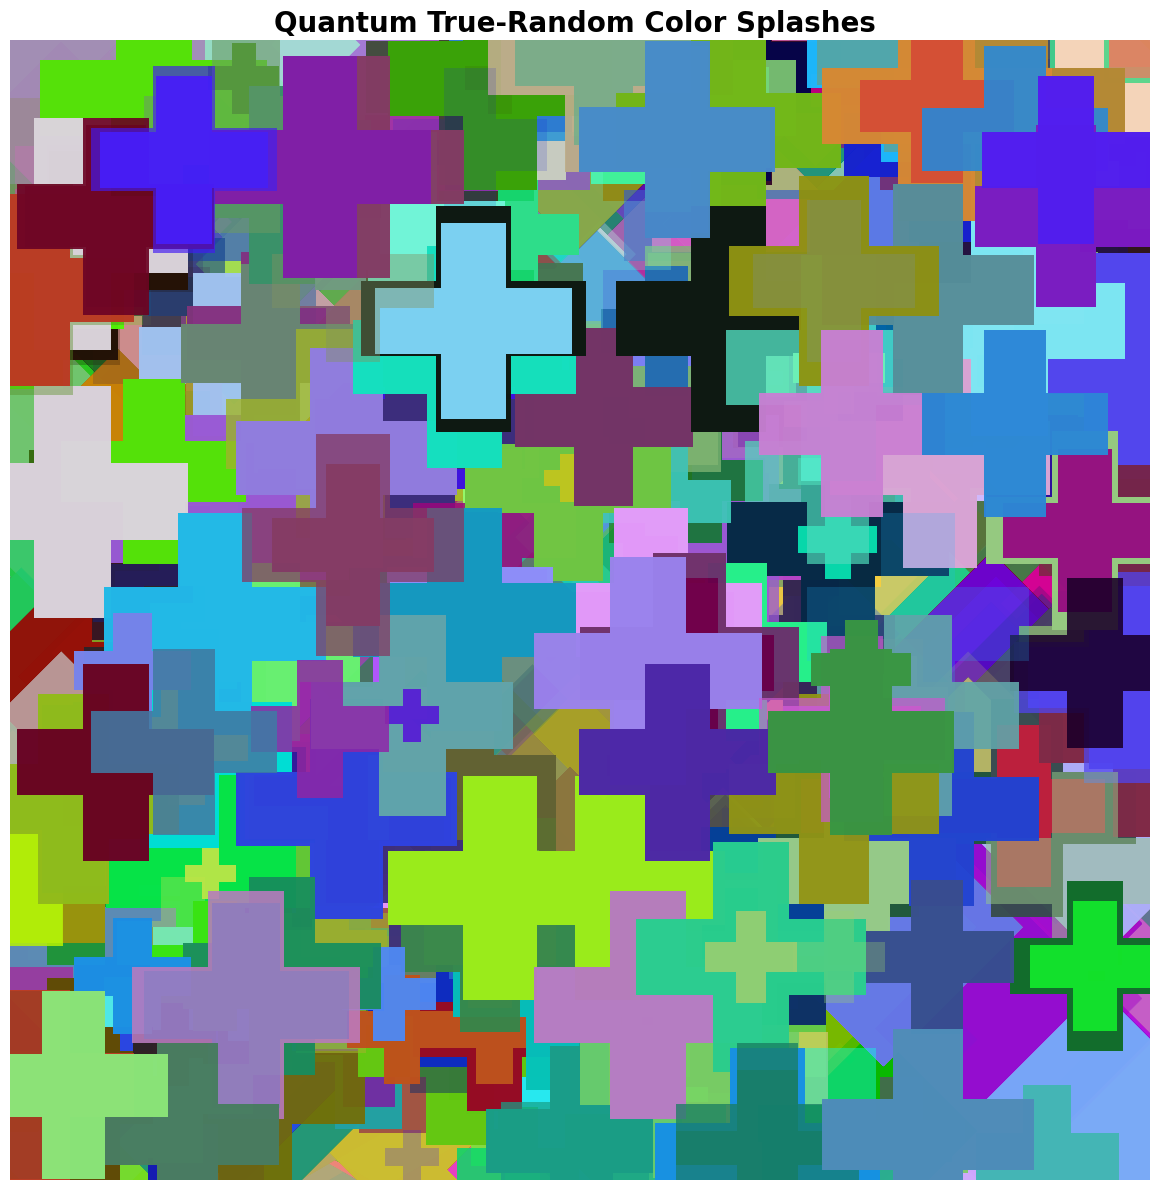

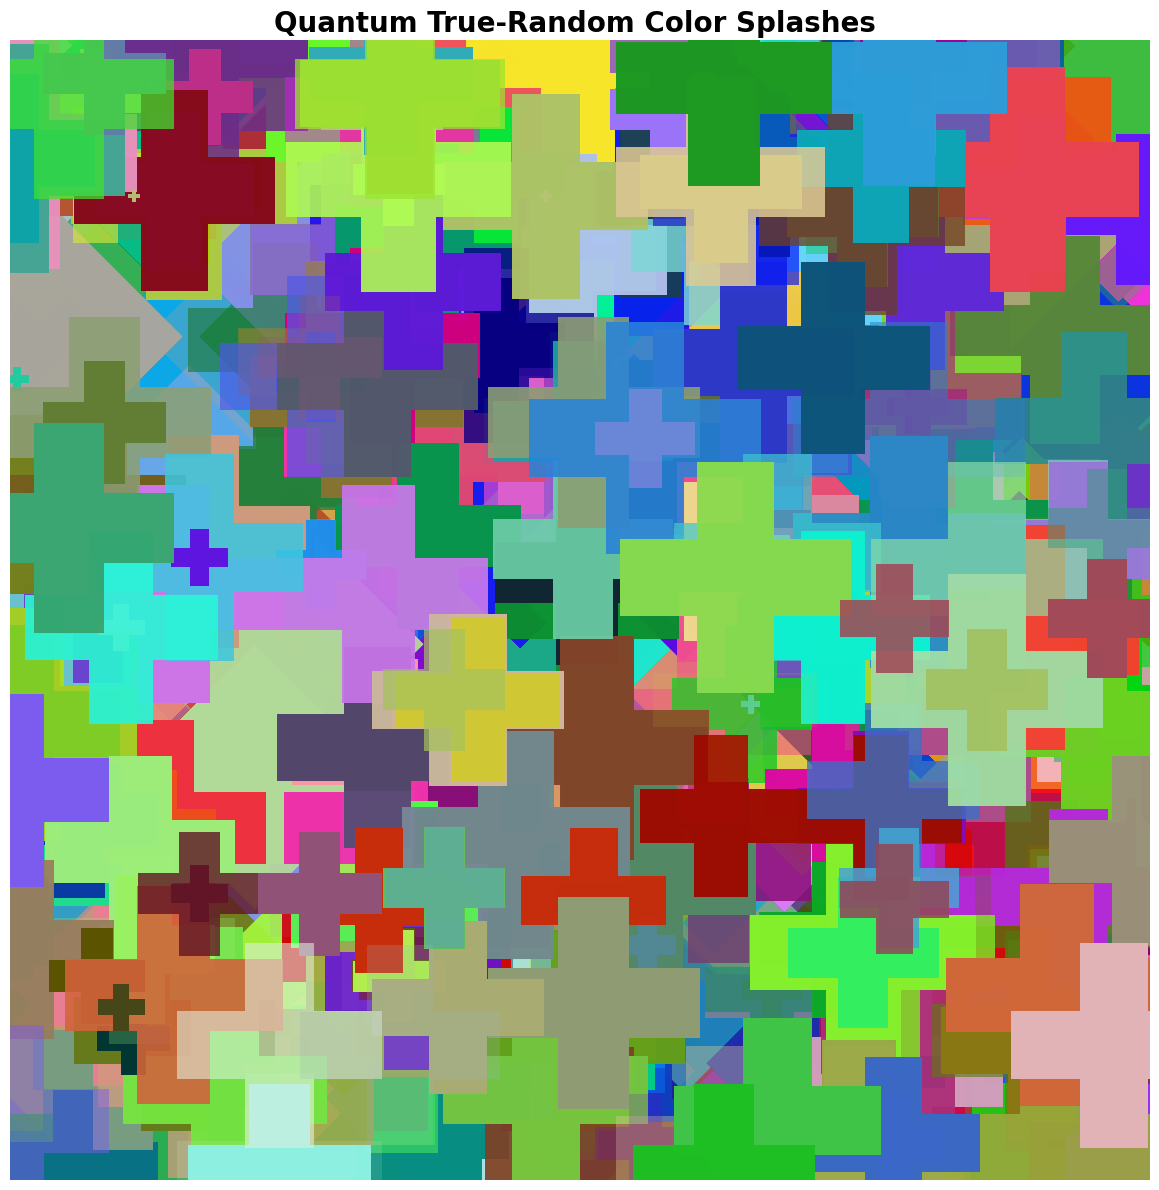

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def quantum_random_floats(num_values, num_qubits=10, low=0.0, high=1.0):
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))

    simulator = AerSimulator()
    transpiled = transpile(qc, simulator)
    shots = num_values
    job = simulator.run(transpiled, shots=shots)
    result = job.result()
    counts = result.get_counts()

    shots_list = []
    for bitstring, freq in counts.items():
        shots_list.extend([bitstring] * freq)

    ints = np.array([int(bs[::-1], 2) for bs in shots_list])
    max_int = 2 ** num_qubits - 1
    floats = low + (high - low) * ints / max_int
    return floats

def quantum_random_ints(num_values, num_qubits=3, low=0, high=7):
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))

    simulator = AerSimulator()
    transpiled = transpile(qc, simulator)
    shots = num_values
    job = simulator.run(transpiled, shots=shots)
    result = job.result()
    counts = result.get_counts()

    shots_list = []
    for bitstring, freq in counts.items():
        shots_list.extend([bitstring] * freq)

    ints = np.array([int(bs[::-1], 2) for bs in shots_list])
    ints = low + (ints % (high - low + 1))
    return ints

# Number of points
n_points = 100000
for i in range(10):
  # Positions
  x_vals = quantum_random_floats(n_points, low=0, high=15)
  y_vals = quantum_random_floats(n_points, low=0, high=15)

  # Sizes (20 to 300)
  sizes = 20 + 28000 * quantum_random_floats(n_points, low=0, high=1)

  # Quantum random RGB colors + alpha
  r_vals = quantum_random_floats(n_points, low=0, high=1)
  g_vals = quantum_random_floats(n_points, low=0, high=1)
  b_vals = quantum_random_floats(n_points, low=0, high=1)
  alphas = quantum_random_floats(n_points, low=0.05, high=0.3)
  colors = np.vstack((r_vals, g_vals, b_vals, alphas)).T

  # Random shape markers
  markers = ['o', '*', '^', 's','X' ,'h', 'D', 'P']
  marker_indices = quantum_random_ints(n_points, low=0, high=len(markers)-1)

  fig, ax = plt.subplots(figsize=(12, 12))
  ax.set_xlim(0, 15)
  ax.set_ylim(0, 15)

  # Background radial gradient for subtle depth
  x_bg = np.linspace(0, 15, 500)
  y_bg = np.linspace(0, 15, 500)
  X_bg, Y_bg = np.meshgrid(x_bg, y_bg)
  Z_bg = np.exp(-0.03 * ((X_bg - 7.5) ** 2 + (Y_bg - 7.5) ** 2))
  ax.imshow(Z_bg, extent=(0, 15, 0, 15), origin='lower', cmap='Greys', alpha=0.4)

  # Plot by marker type for speed
  for i, marker in enumerate(markers):
      idxs = np.where(marker_indices == i)[0]
      if len(idxs) == 0:
          continue
      ax.scatter(
          x_vals[idxs],
          y_vals[idxs],
          c=colors[idxs],
          s=sizes[idxs],
          marker=marker,
          edgecolors='none',
          linewidths=0
      )

  ax.axis('off')
  plt.title("Quantum True-Random Color Splashes ", fontsize=20, weight='bold')
  plt.tight_layout()
  plt.show()
